In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter




In [ ]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员特征筛选后-心理健康数据集.csv')
data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

y = data['anxiety']
X = data.drop('anxiety', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform SMOTE over-sampling on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
rusboost = RUSBoostClassifier(n_estimators=100, random_state=42)

models = [rf, lgbm, brf, rusboost]
model_names = ['Random Forest', 'XGBoost', 'LightGBM', 'Balanced Random Forest', 'RUSBoost']

for i, model in enumerate(models):
    print(f"Training {model_names[i]}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_names[i]}:\n")
    print(classification_report(y_test, y_pred))

Training Random Forest...


Accuracy: 64.46
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      1139
         1.0       0.60      0.56      0.57       836
         2.0       0.22      0.44      0.29       112
         3.0       0.22      0.76      0.34        29

    accuracy                           0.64      2116
   macro avg       0.46      0.62      0.49      2116
weighted avg       0.69      0.64      0.66      2116



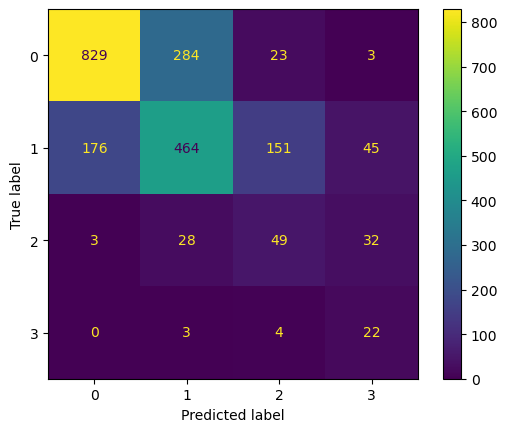

Recall:  0.6446124763705104
ROC AUC:  0.7403141854984994
F1:  0.6626069242391208


In [10]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/BalancedRandomForestClassifier-科技人员特征筛选后-心理健康数据集.csv')
# data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
data = data.drop(['depression', 'suicide'], axis=1)

# y = data['depression']
# X = data.drop('depression', axis=1)

y = data['anxiety']
X = data.drop('anxiety', axis=1)

# y = data['suicide']
# X = data.drop('suicide', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

brfc = BalancedRandomForestClassifier(class_weight = 'balanced',random_state=20,max_depth= 15, min_samples_split = 2, n_estimators=200)
brfc.fit(x_train, y_train)
y_pred = brfc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)


# clf1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
# clf2 = LogisticRegression(class_weight='balanced', random_state=42)
# clf3 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# # define ensemble classifier
# estimators = [('dt', clf1), ('lr', clf2), ('rf', clf3)]
# ensemble = VotingClassifier(estimators=estimators, voting='soft')

# # fit ensemble classifier on the imbalanced dataset
# ensemble.fit(x_train, y_train)
# print(Counter(y_train))
# # evaluate the ensemble classifier on the imbalanced dataset
# y_pred = ensemble.predict(x_test)
# report = classification_report(y_test, y_pred)
# print(report)

# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.2f' % (accuracy*100))
# cm = confusion_matrix(y_test, y_pred)
# # 绘制混淆矩阵
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()
# precision = precision_score(y_test, y_pred,average='weighted')
# recall = recall_score(y_test, y_pred,average='weighted')

# lb = LabelBinarizer()
# lb.fit(y_test)
# y_test_b = lb.transform(y_test)
# y_pred_b = lb.transform(y_pred)
# roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# # evaluate the performance of the model
# score = ensemble.score(x_test, y_test)
# print("Precision: {:.2f}%".format(precision * 100))
# print("Recall: {:.2f}%".format(recall * 100))
# print('ROC AUC: ', roc_auc)



/Users/wangxiaoyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.03      0.12      0.05        17
         2.0       0.02      0.04      0.03        28
         3.0       0.19      0.09      0.12       103
         4.0       0.94      0.94      0.94      1968

    accuracy                           0.88      2116
   macro avg       0.30      0.29      0.28      2116
weighted avg       0.89      0.88      0.88      2116



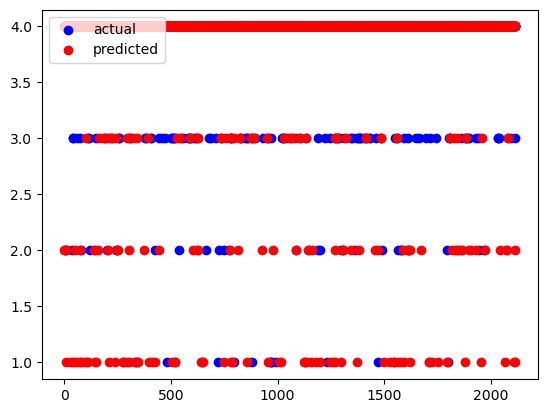

RMSE: 0.6625978545273118
RMSE of the baseline model: 0.4050477755258935


In [104]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员特征筛选后-心理健康数据集.csv')
data = data.drop(['depression', 'anxiety'], axis=1)
y = data['suicide']
X = data.drop('suicide', axis=1)
# model = RandomForestRegressor(n_estimators=150, random_state=20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

clf1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=20)
clf2 = LogisticRegression(class_weight='balanced', random_state=20)
clf3 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=20)

# define ensemble classifier
estimators = [('dt', clf1), ('lr', clf2), ('rf', clf3)]
ensemble = VotingClassifier(estimators=estimators, voting='soft')

# fit ensemble classifier on the imbalanced dataset
ensemble.fit(x_train, y_train)

# evaluate the ensemble classifier on the imbalanced dataset
y_pred = ensemble.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

# 绘制散点图
plt.scatter(np.arange(len(y_test)), y_test, c='b', label='actual')
plt.scatter(np.arange(len(y_test)), y_pred, c='r', label='predicted')
plt.legend(loc='upper left')
plt.show()

# 输出RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

y_mean = np.mean(y_test)

# Create an array of y_mean values with the same length as y_test
y_pred = np.full_like(y_test, y_mean)

# Calculate the RMSE of the baseline model
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of the baseline model:", rmse_baseline)

Accuracy: 74.10
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      1842
         1.0       0.24      0.50      0.33       245
         2.0       0.18      0.66      0.28        29

    accuracy                           0.74      2116
   macro avg       0.46      0.64      0.49      2116
weighted avg       0.86      0.74      0.78      2116



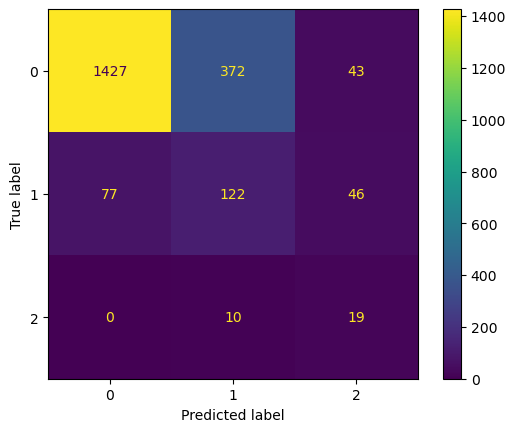

Recall:  0.7410207939508506
ROC AUC:  0.7333328787714728
F1:  0.7840297304437709


In [6]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/科技人员特征筛选后-心理健康数据集.csv')
data = data.drop(['anxiety', 'suicide'], axis=1)
# data = data.drop(['depression', 'anxiety'], axis=1)
# data = data.drop(['depression', 'suicide'], axis=1)

y = data['depression']
X = data.drop('depression', axis=1)

# y = data['anxiety']
# X = data.drop('anxiety', axis=1)

rfc = BalancedRandomForestClassifier(class_weight = 'balanced',random_state=20,max_depth= 15, min_samples_split = 2, n_estimators=200)
# 进行交叉验证，得到预测结果
# scores = cross_val_score(rfc, X, y, cv=5)
# y_pred = cross_val_predict(rfc, X, y, cv=5)

# # # 输出交叉验证得分和分类报告
# print('平均得分：', scores.mean())
# print("交叉验证准确性：", scores)
# print("交叉验证平均准确性：", np.mean(scores))
# print("交叉验证召回率：", cross_val_score(rfc, X, y, cv=5, scoring='recall_macro'))
# print("交叉验证F1值：", cross_val_score(rfc, X, y, cv=5, scoring='f1_macro'))

# 预测所有数据并生成混淆矩阵
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_pred = rfc.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

report = classification_report(y_test, y_pred)
print(report)
# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b, multi_class='ovr')

# roc_auc = roc_auc_score(y_test, pred_prob, multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('F1: ', f1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [51]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
y_pred = rf.predict(X_test)


In [53]:
# calculate precision and recall
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))


NameError: name 'precision_score' is not defined